<a href="https://colab.research.google.com/github/BOINISHIVANANDAM/codeinza/blob/master/Project_A4_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset

fatal: destination path 'PlantVillage-Dataset' already exists and is not an empty directory.


In [44]:
import warnings
warnings.filterwarnings("ignore")
import os
import glob
import matplotlib.pyplot as plt
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [45]:
train_dir ="/content/PlantVillage-Dataset/data_distribution_for_SVM/train"
test_dir="/content/PlantVillage-Dataset/data_distribution_for_SVM/test"

In [46]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [47]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) 
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

38 Classes
8751 Train images
10547 Test images


In [48]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [49]:
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)


Found 8751 images belonging to 38 classes.
Found 10547 images belonging to 38 classes.


In [50]:
import tensorflow 
from keras.applications import ResNet50
from keras.optimizers import Adam
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in resnet.layers[:-4]:
    layer.trainable = False

def nvidia_model():
  model = Sequential()
  model.add(resnet)

  model.add(Dropout(0.5))
  
  model.add(Flatten())
  
  model.add(Dense(100, activation='elu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(50, activation='elu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(10, activation='elu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(38))
  
  optimizer = Adam(lr=1e-3)
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model

model = nvidia_model()
print(model.summary())  

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 8, 8, 2048)        23587712  
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 8, 2048)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               13107300  
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)               

In [51]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['resnet50', 'dropout_6', 'flatten_3', 'dense_10', 'dropout_7', 'dense_11', 'dropout_8', 'dense_12', 'dropout_9', 'dense_13']


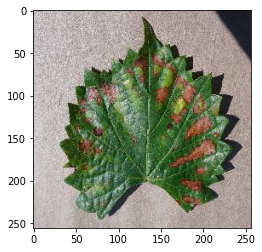

In [52]:
import tensorflow
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/PlantVillage-Dataset/data_distribution_for_SVM/train/12/049c8615-7d94-4a4b-8467-fe20c0cecac1.JPG')
plt.imshow(img1);
img1 = image.load_img('/content/PlantVillage-Dataset/data_distribution_for_SVM/test/13/00d8329b-6621-4e08-8ec5-cf702eb3b205.JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

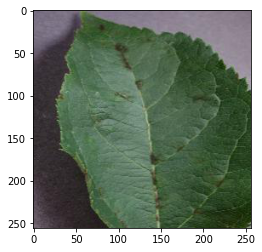

In [53]:
import tensorflow
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/PlantVillage-Dataset/data_distribution_for_SVM/train/0/0a00778d-10e2-4d9d-a63a-8c2b6e3a28ae.JPG')
plt.imshow(img1);
img1 = image.load_img('/content/PlantVillage-Dataset/data_distribution_for_SVM/test/0/1077a302-ade9-40de-be8a-bc2a72a73c37.JPG', target_size=(256, 256))
img1 = image.img_to_array(img1)
img1 = img/255
img1 = np.expand_dims(img1, axis=0)

In [54]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 23104)            

In [55]:
import tensorflow
from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_6').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_6').output)
conv2d_2_output=Model(inputs=model.input,outputs=model.get_layer('conv2d_7').output)
max_pooling2d_2_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_7').output)
conv2d_3_output=Model(inputs=model.input,outputs=model.get_layer('conv2d_8').output)
max_pooling2d_3_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_8').output)
flatten_1_output=Model(inputs=model.input,outputs=model.get_layer('flatten_4').output)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
conv2d_3_features = conv2d_3_output.predict(img)
max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)

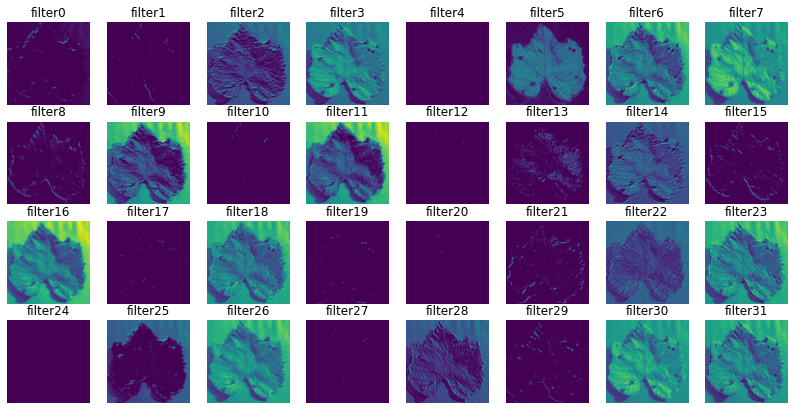

In [56]:

import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

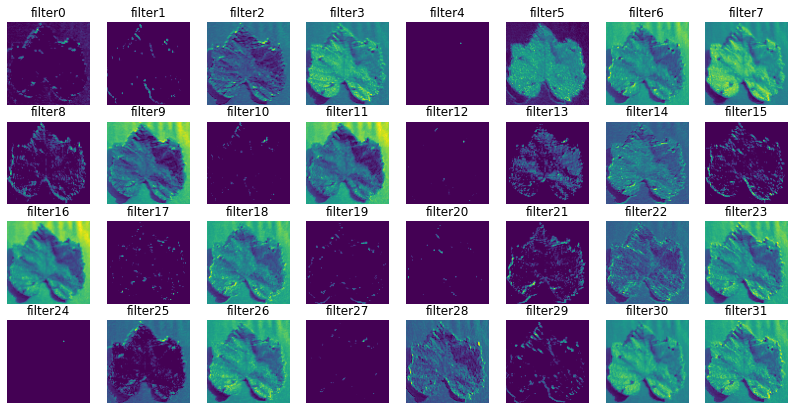

In [57]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

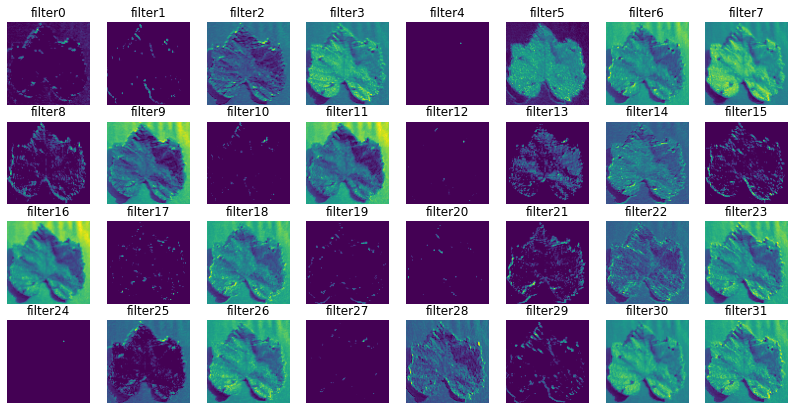

In [58]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

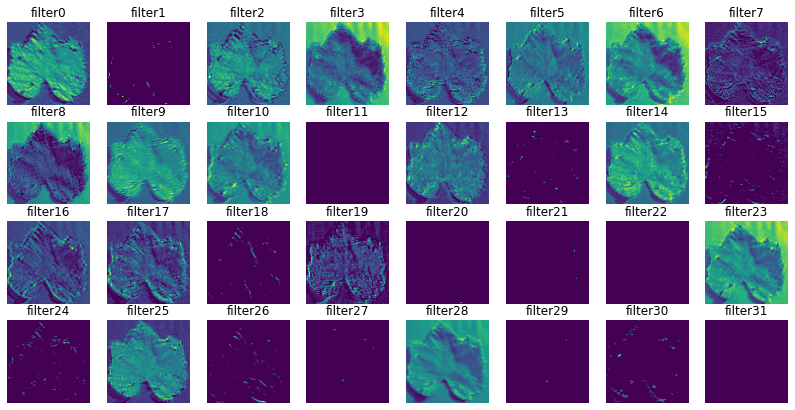

In [59]:

import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

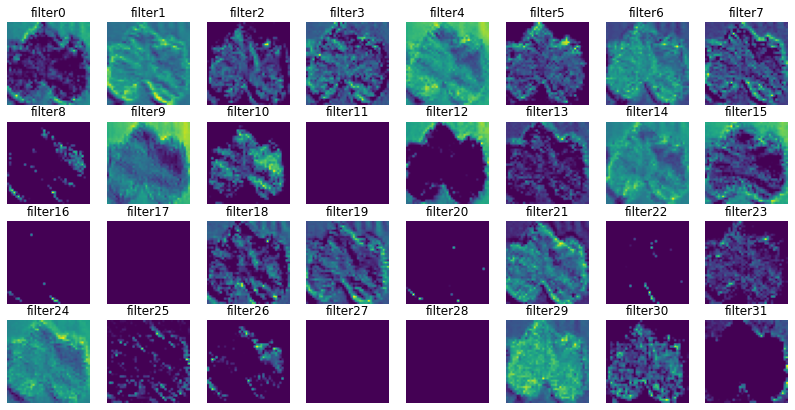

In [60]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

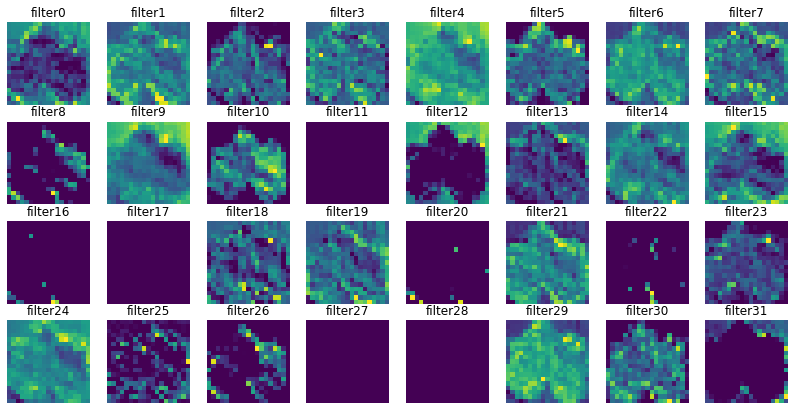

In [61]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_3_features[0, :, :, i], cmap='viridis')
plt.show()

In [62]:
validation_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(img_height, img_width),
    batch_size=batch_size)

Found 8751 images belonging to 38 classes.


In [63]:
# Pre-processing data with parameters.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [64]:
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32
train_generator =train_datagen.flow_from_directory(train_dir,
                                target_size=(img_width,img_height),                                                    batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(img_width,img_height),                                               batch_size=batch_size)

Found 8751 images belonging to 38 classes.
Found 10547 images belonging to 38 classes.


In [65]:
# The name of the 12 diseases.
train_generator.class_indices

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14,
 '22': 15,
 '23': 16,
 '24': 17,
 '25': 18,
 '26': 19,
 '27': 20,
 '28': 21,
 '29': 22,
 '3': 23,
 '30': 24,
 '31': 25,
 '32': 26,
 '33': 27,
 '34': 28,
 '35': 29,
 '36': 30,
 '37': 31,
 '4': 32,
 '5': 33,
 '6': 34,
 '7': 35,
 '8': 36,
 '9': 37}

In [ ]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 23104)            

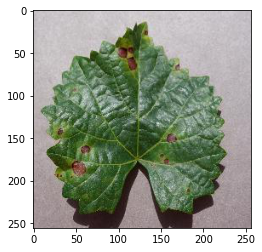

In [ ]:
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/PlantVillage-Dataset/data_distribution_for_SVM/train/11/0223acbd-72eb-42eb-8fab-e1bca2734327.JPG')
plt.imshow(img1);
#preprocess image
img1 = image.load_img('/content/PlantVillage-Dataset/data_distribution_for_SVM/test/11/0310d052-9328-4e6a-8a70-243c818bbc08.JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_3').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_3').output)
conv2d_2_output=Model(inputs=model.input,outputs=model.get_layer('conv2d_4').output)
max_pooling2d_2_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_4').output)
conv2d_3_output=Model(inputs=model.input,outputs=model.get_layer('conv2d_5').output)
max_pooling2d_3_output=Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_5').output)
flatten_1_output=Model(inputs=model.input,outputs=model.get_layer('flatten_2').output)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
conv2d_3_features = conv2d_3_output.predict(img)
max_pooling2d_3_features = max_pooling2d_3_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)

In [66]:
validation_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(img_height, img_width),
    batch_size=batch_size)

Found 8751 images belonging to 38 classes.


In [80]:
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          epochs=30,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          validation_steps =validation_generator.samples// batch_size,verbose=1)

Epoch 1/30
273/273 [==============================] - 219s 801ms/step - loss: 1.1054 - accuracy: 0.6633 - val_loss: 0.7555 - val_accuracy: 0.7639
Epoch 2/30
273/273 [==============================] - 219s 801ms/step - loss: 0.9017 - accuracy: 0.7198 - val_loss: 0.6395 - val_accuracy: 0.7989
Epoch 3/30
273/273 [==============================] - 218s 799ms/step - loss: 0.7869 - accuracy: 0.7493 - val_loss: 0.5316 - val_accuracy: 0.8314
Epoch 4/30
273/273 [==============================] - 218s 797ms/step - loss: 0.6502 - accuracy: 0.7930 - val_loss: 0.5716 - val_accuracy: 0.8125
Epoch 5/30
273/273 [==============================] - 217s 795ms/step - loss: 0.5975 - accuracy: 0.8075 - val_loss: 0.5304 - val_accuracy: 0.8246
Epoch 6/30
273/273 [==============================] - 217s 795ms/step - loss: 0.5451 - accuracy: 0.8260 - val_loss: 0.3021 - val_accuracy: 0.9068
Epoch 7/30
273/273 [==============================] - 217s 795ms/step - loss: 0.4658 - accuracy: 0.8478 - val_loss: 0.3250 -

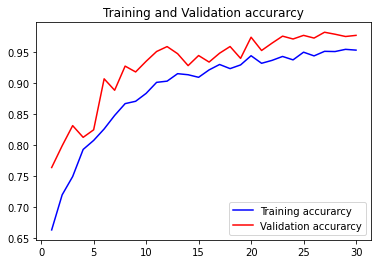

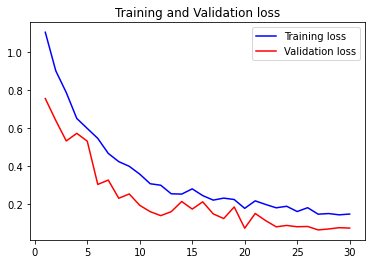

In [81]:
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()